# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise Estatística Para Data Science com Linguagem Python</font>

## <font color='blue'>Mini-Projeto 2</font>
### <font color='blue'>Marketing Analítico - Análise Estatística com Testes A/B em Portais de E-Commerce</font>

![title](imagens/MP2.png)

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.18


In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [2]:
# Imports
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
random.seed(42)

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

seaborn    : 0.13.2
statsmodels: 0.14.1
pandas     : 2.0.3
matplotlib : 3.8.2
numpy      : 1.22.1
scipy      : 1.7.3



## Carregando os Dados

In [4]:
dados = pd.read_csv("dados/dataset.csv")

In [5]:
dados.shape

(294460, 5)

In [6]:
dados.sample(10)

,id_usuario,timestamp,grupo,pagina,converteu
58759,755431,2023-01-12 13:57:26.125071,controle,pagina_sem_cta,0
277149,708013,2023-01-24 07:01:42.727645,tratamento,pagina_com_cta,0
184242,714151,2023-01-09 12:58:31.722810,tratamento,pagina_com_cta,0
210134,697020,2023-01-18 10:32:31.019896,tratamento,pagina_com_cta,0
11356,792922,2023-01-22 04:46:12.206027,tratamento,pagina_com_cta,0
205356,775600,2023-01-04 19:14:11.816422,controle,pagina_sem_cta,0
42649,759566,2023-01-10 07:06:50.683565,tratamento,pagina_com_cta,0
88587,790410,2023-01-24 03:29:20.327314,controle,pagina_sem_cta,0
174623,779500,2023-01-16 07:04:41.411017,tratamento,pagina_com_cta,0
51982,746451,2023-01-10 13:37:32.684325,tratamento,pagina_com_cta,0


O grupo de controle representa a versão atual ou padrão que está sendo usada, enquanto o grupo de tratamento representa a versão modificada que você deseja testar.

## Análise Exploratória

In [7]:
# Verifica se há valores nulos
print(dados.isnull().sum())

id_usuario    0
timestamp     0
grupo         0
pagina        0
converteu     0
dtype: int64


In [8]:
# Verifica a distribuição dos grupos (controle e tratamento)
print(dados['grupo'].value_counts())

grupo
controle      147270
tratamento    147190
Name: count, dtype: int64


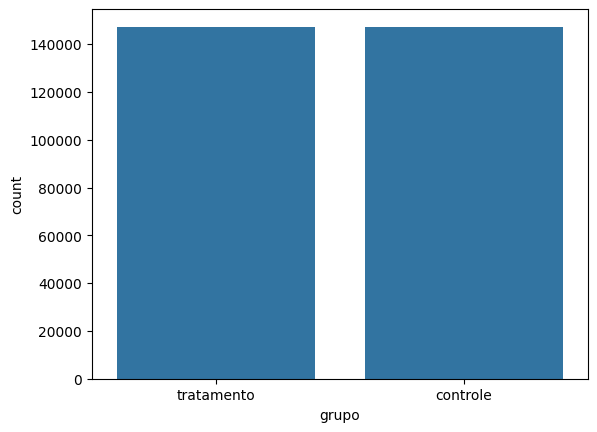

In [9]:
# Visualiza a distribuição dos grupos
sns.countplot(data = dados, x = 'grupo')
plt.show()

In [10]:
# Verifica a distribuição de conversões nos grupos
print(pd.crosstab(dados['grupo'], dados['converteu']))

converteu        0      1
grupo                    
controle    129756  17514
tratamento  129467  17723


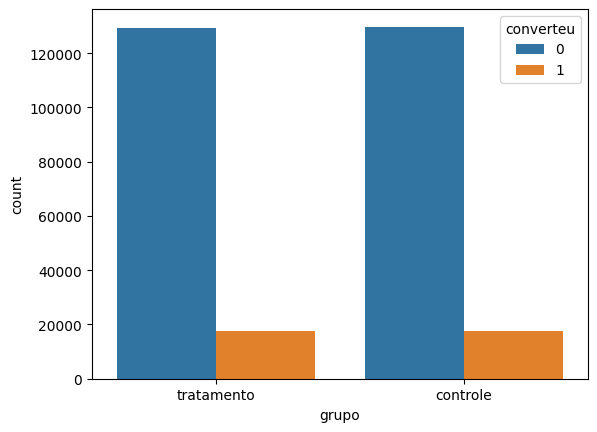

In [11]:
# Visualiza a distribuição de conversões nos grupos
sns.countplot(data = dados, x = 'grupo', hue = 'converteu')
plt.show()

In [12]:
# Verifica a relação entre a coluna 'grupo' e a coluna 'pagina'
print(pd.crosstab(dados['grupo'], dados['pagina']))

pagina      pagina_com_cta  pagina_sem_cta
grupo                                     
controle              1965          145305
tratamento          145262            1928


In [13]:
# Verifica se o número de observações nos grupos é balanceado
print("Número de observações no grupo de controle:", len(dados[dados['grupo'] == 'controle']))
print("Número de observações no grupo de tratamento:", len(dados[dados['grupo'] == 'tratamento']))

Número de observações no grupo de controle: 147270
Número de observações no grupo de tratamento: 147190


## Teste A/B com Teste Estatístico

In [14]:
# Separa os grupos de controle e tratamento
grupo_controle = dados[dados['grupo'] == 'controle']
grupo_tratamento = dados[dados['grupo'] == 'tratamento']

In [15]:
grupo_controle.head()

,id_usuario,timestamp,grupo,pagina,converteu
1,888545,2023-01-08 06:37:26.332945,controle,pagina_sem_cta,1
4,892356,2023-01-05 09:35:14.904865,controle,pagina_sem_cta,1
5,661590,2023-01-11 16:55:06.154213,controle,pagina_sem_cta,0
6,853541,2023-01-08 18:28:03.143765,controle,pagina_sem_cta,0
9,679687,2023-01-19 03:26:46.940749,controle,pagina_sem_cta,1


In [16]:
grupo_tratamento.head()

,id_usuario,timestamp,grupo,pagina,converteu
0,847721,2023-01-17 14:01:00.090575,tratamento,pagina_com_cta,0
2,851104,2023-01-21 22:11:48.556739,tratamento,pagina_com_cta,0
3,804228,2023-01-12 08:01:45.159739,tratamento,pagina_com_cta,0
7,864975,2023-01-21 01:52:26.210827,tratamento,pagina_com_cta,1
8,936923,2023-01-10 15:20:49.083499,tratamento,pagina_com_cta,0


In [17]:
# Calcule as taxas de conversão
taxa_controle = grupo_controle['converteu'].mean()
taxa_tratamento = grupo_tratamento['converteu'].mean()

In [18]:
print(f"Taxa de conversão do grupo de controle: {taxa_controle:.2%}")
print(f"Taxa de conversão do grupo de tratamento: {taxa_tratamento:.2%}")

Taxa de conversão do grupo de controle: 11.89%
Taxa de conversão do grupo de tratamento: 12.04%


In [19]:
# Teste de hipótese
alfa = 0.05
hipotese_nula = "Não há diferença na taxa de conversão entre a pagina_com_cta e a pagina_sem_cta"
hipotese_alternativa = "Há diferença na taxa de conversão entre a pagina_com_cta e a pagina_sem_cta"

A função stats.ttest_ind() é uma função da biblioteca SciPy. Esta função realiza um Teste t de Student independente para duas amostras. O objetivo do Teste t é determinar se existe uma diferença estatisticamente significativa entre as médias de duas populações independentes.

A função stats.ttest_ind() recebe dois argumentos principais, que são as duas amostras (geralmente na forma de listas, arrays ou séries do pandas) para as quais você deseja testar a diferença entre as médias. A função retorna dois valores: a estatística t e o valor p.

A estatística t é um valor calculado que ajuda a determinar a diferença entre as médias das duas amostras em relação ao erro padrão combinado das amostras. Um valor t grande (positivo ou negativo) indica uma diferença maior entre as médias, enquanto um valor t próximo de zero indica que as médias são semelhantes.

O valor-p é uma medida de significância estatística. Ele indica a probabilidade de observar uma diferença igual ou maior do que a encontrada, assumindo que não há diferença real entre as médias das populações (ou seja, a hipótese nula é verdadeira). Um valor-p baixo (geralmente menor que 0,05) sugere que podemos rejeitar a hipótese nula e concluir que há uma diferença estatisticamente significativa entre as médias das duas populações.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [20]:
# Aplica o teste
estatistica_t, p_valor = stats.ttest_ind(grupo_controle['converteu'], grupo_tratamento['converteu'])

In [21]:
print(f"Estatística t: {estatistica_t}")
print(f"Valor-p: {p_valor}")

Estatística t: -1.2410056296293919
Valor-p: 0.21460465788124805


In [22]:
if p_valor < alfa:
    print(f"Rejeitamos a hipótese nula. {hipotese_alternativa}")
else:
    print(f"Não podemos rejeitar a hipótese nula. {hipotese_nula}")

Não podemos rejeitar a hipótese nula. Não há diferença na taxa de conversão entre a pagina_com_cta e a pagina_sem_cta


## Teste A/B com Regressão Logística

Leia os manuais em pdf no Capítulo 6 do curso.

In [23]:
dados.head()

,id_usuario,timestamp,grupo,pagina,converteu
0,847721,2023-01-17 14:01:00.090575,tratamento,pagina_com_cta,0
1,888545,2023-01-08 06:37:26.332945,controle,pagina_sem_cta,1
2,851104,2023-01-21 22:11:48.556739,tratamento,pagina_com_cta,0
3,804228,2023-01-12 08:01:45.159739,tratamento,pagina_com_cta,0
4,892356,2023-01-05 09:35:14.904865,controle,pagina_sem_cta,1


In [28]:
# Criamos variável dummy para a coluna 'grupo'
dados['grupo_encoded'] = pd.get_dummies(dados['grupo'], dtype='int' ,drop_first = True)

In [29]:
dados.head()

,id_usuario,timestamp,grupo,pagina,converteu,grupo_encoded
0,847721,2023-01-17 14:01:00.090575,tratamento,pagina_com_cta,0,1
1,888545,2023-01-08 06:37:26.332945,controle,pagina_sem_cta,1,0
2,851104,2023-01-21 22:11:48.556739,tratamento,pagina_com_cta,0,1
3,804228,2023-01-12 08:01:45.159739,tratamento,pagina_com_cta,0,1
4,892356,2023-01-05 09:35:14.904865,controle,pagina_sem_cta,1,0


In [32]:
# Definimos a variável dependente (y) e a variável independente (X)
y = dados['converteu']
X = dados['grupo_encoded']

In [33]:
# Adicionamos uma constante ao modelo
X = sm.add_constant(X)

In [34]:
# Criamos o modelo de regressão logística
modelo_logit = sm.Logit(y, X)

In [35]:
# Treinamos o modelo
modelo = modelo_logit.fit()

Optimization terminated successfully.
         Current function value: 0.366257
         Iterations 6


In [36]:
# Imprima o resumo do modelo
print(modelo.summary())

                           Logit Regression Results                           
Dep. Variable:              converteu   No. Observations:               294460
Model:                          Logit   Df Residuals:                   294458
Method:                           MLE   Df Model:                            1
Date:                Wed, 13 Mar 2024   Pseudo R-squ.:               7.140e-06
Time:                        09:19:48   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2146
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.0027      0.008   -248.774      0.000      -2.018      -1.987
grupo_encoded     0.0141      0.011      1.241      0.215      -0.008       0.036


In [37]:
# Calculamos as odds ratios
odds_ratios = pd.DataFrame({'coef': modelo.params, 'OR': np.exp(modelo.params)})

In [38]:
print(odds_ratios)

                   coef        OR
const         -2.002655  0.134976
grupo_encoded  0.014092  1.014192


Os coeficientes do modelo de regressão logística podem ser interpretados em termos de log-odds (logit ou coef) e odds ratios. 

Vamos entender como interpretar essas medidas:

**Log-odds (coeficientes)**:

Os coeficientes do modelo de regressão logística representam o efeito de uma unidade de mudança na variável independente (explicativa) sobre o log-odds da variável dependente (resposta). 

Um coeficiente positivo indica que, à medida que a variável independente aumenta, o log-odds da variável dependente também aumenta, tornando o evento mais provável. Por outro lado, um coeficiente negativo indica que, à medida que a variável independente aumenta, o log-odds da variável dependente diminui, tornando o evento menos provável.

**Odds ratios**:

As odds ratios são obtidas ao exponenciar os coeficientes do modelo de regressão logística. Uma odds ratio (OR) representa o fator de mudança nas odds da variável dependente em resposta a uma unidade de mudança na variável independente. Aqui estão algumas interpretações básicas para as odds ratios:

- OR = 1: A variável independente não tem efeito sobre a variável dependente.


- OR > 1: A variável independente tem um efeito positivo sobre a variável dependente. À medida que a variável independente aumenta, as odds da variável dependente também aumentam.


- OR < 1: A variável independente tem um efeito negativo sobre a variável dependente. À medida que a variável independente aumenta, as odds da variável dependente diminuem.

Ajustamos um modelo de regressão logística com a variável independente 'grupo_tratamento' e obtivemos os seguintes resultados:

- coef: -0.014092
- OR: 1.014192

Aqui, o coeficiente negativo (-0.014092) indica que o grupo de tratamento tem um efeito negativo sobre a conversão. A odds ratio de 1.014192 indica que as odds de conversão no grupo de tratamento são aproximadamente 1.014192 vezes maiores do que no grupo de controle, mantendo as outras variáveis constantes.

## Conclusões

- Fizemos um teste A/B para um site de comércio eletrônico a fim de ajudar a decidir se a empresa deveria implementar a nova página, manter a página antiga ou talvez executar o experimento por mais tempo.

- A partir do resultado do nosso Teste A/B, descobrimos que a hipótese de a nova página obter maior taxa de conversão tem uma probabilidade muito baixa, portanto, acreditamos que permanecer com a página antiga é uma decisão mais adequada.

# Fim